<a href="https://colab.research.google.com/github/francesco-source/Machine-Learning/blob/main/Classification_30_06_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Exam 30/06/2022

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
random_state = 42
np.random.seed(random_state)

##1.  Load the data into a data frame with the proper coding of nulls, rename the columns to numbers starting from 1, as shown in the description file

In [56]:
data = pd.read_csv("horse-colic.csv",header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [57]:
data = data.replace({"?":None})
data.head()
data.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [58]:
new_names = {}
for i in data.columns:
  new_names[i] = i+1


In [59]:
data.rename(columns = new_names, inplace = True)


In [60]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,2,1,530101,38.50,66,28,3,3,None,2,...,45.00,8.40,None,None,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,None,None,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,None,None,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,None,None,6,2,...,74.00,7.40,None,None,2,2,4300,0,0,2


In [61]:
df = data.drop([3,25,26,27,28],axis = 1)


In [62]:
print("The size of the dataset is: ",df.size)
print("The shape of the dataset is equal to:", df.shape)
na_values = {}
for column in df.columns:
     missing_values =  len( df[column].values[df[column].isna()] )
     na_values[column] =  missing_values
print("For each column we have this none values :",na_values)

The size of the dataset is:  6900
The shape of the dataset is equal to: (300, 23)
For each column we have this none values : {1: 1, 2: 0, 4: 60, 5: 24, 6: 58, 7: 56, 8: 69, 9: 47, 10: 32, 11: 55, 12: 44, 13: 56, 14: 104, 15: 106, 16: 247, 17: 102, 18: 118, 19: 29, 20: 33, 21: 165, 22: 198, 23: 1, 24: 0}


##2.  Use column 23 as target for classification. Drop the rows where the target is null.  Impute the nulls on the predicting columns using the column means (you can use the sklearn.impute.SimpleImputer)


In [63]:
df = df.dropna(axis = 0, subset = [23])
X = df.drop(23, axis = 1)
y = df[23]

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_t = imp_mean.fit_transform(X)
X_t = pd.DataFrame(X_t,columns =  X.columns)
X = X_t

##3.  Train, tune and test a classification model of your choice with cross–validation. Plot the resulting confusion matrix on the test set, normalising for true values. Show the values F1-Score (macro) and Cohen Kappa Score on the test set.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=random_state)

I will use Random Forest Classifier

In [65]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=random_state)

parameters = {'max_depth':list(range(1,10)),'n_estimators':list(range(10,100,10))}

rf_grid_searccv = GridSearchCV(rf,param_grid=parameters,scoring="accuracy")

rf_grid_searccv.fit(X_train,y_train)

rf_best = rf_grid_searccv.best_estimator_

y_pred_rf = rf_best.predict(X_test)

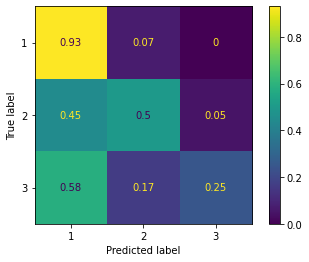

In [70]:
cfm = confusion_matrix(y_test,y_pred_rf,normalize="true")
disp = ConfusionMatrixDisplay.from_estimator(rf_best,X_test,y_test,normalize="true");

In [67]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score

print("The Cohen Kappa Score is eqaul to:", cohen_kappa_score(y_test,y_pred_rf).round(4))
print("The F1-Score is equal to: ", f1_score(y_test,y_pred_rf,average = "macro").round(4))

The Cohen Kappa Score is eqaul to: 0.4249
The F1-Score is equal to:  0.5848


## 4. Repeat step 3 with a different classification model.

In [73]:
knn = KNeighborsClassifier()

tuned_param_knn = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

model = GridSearchCV(estimator = knn, param_grid=tuned_param_knn, scoring = "accuracy")

model.fit(X_train,y_train)

knn = model.best_estimator_

y_pred_knn = knn.predict(X_test)

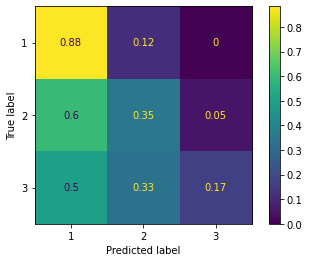

In [76]:
cfm = confusion_matrix(y_test,y_pred_knn,normalize="true")
disp = ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test,normalize="true");

In [74]:

print("The Cohen Kappa Score is eqaul to:", cohen_kappa_score(y_test,y_pred_knn).round(4))
print("The F1-Score is equal to: ", f1_score(y_test,y_pred_knn,average = "macro").round(4))

The Cohen Kappa Score is eqaul to: 0.266
The F1-Score is equal to:  0.4744


##5. Choose the best model and comment the result.

The best classification model is the Random Forest because has a higher F1 score, that is the armonic sum of precision and recall. And also a higher Coheren Kappa Score means that we are able to classify better